In [22]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

data = pd.read_csv("World-happiness-report-2024.csv")

print(data.head())


  Country name            Regional indicator  Ladder score  upperwhisker  \
0      Finland                Western Europe         7.741         7.815   
1      Denmark                Western Europe         7.583         7.665   
2      Iceland                Western Europe         7.525         7.618   
3       Sweden                Western Europe         7.344         7.422   
4       Israel  Middle East and North Africa         7.341         7.405   

   lowerwhisker  Log GDP per capita  Social support  Healthy life expectancy  \
0         7.667               1.844           1.572                    0.695   
1         7.500               1.908           1.520                    0.699   
2         7.433               1.881           1.617                    0.718   
3         7.267               1.878           1.501                    0.724   
4         7.277               1.803           1.513                    0.740   

   Freedom to make life choices  Generosity  Perceptions of co

In [23]:
data.info()

data.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64

In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ladder score,143.0,5.527580,1.170717,1.721,4.72600,5.7850,6.41600,7.741
upperwhisker,143.0,5.641175,1.155008,1.775,4.84550,5.8950,6.50750,7.815
lowerwhisker,143.0,5.413972,1.187133,1.667,4.60600,5.6740,6.31900,7.667
Log GDP per capita,140.0,1.378807,0.425098,0.000,1.07775,1.4315,1.74150,2.141
Social support,140.0,1.134329,0.333317,0.000,0.92175,1.2375,1.38325,1.617
Healthy life expectancy,140.0,0.520886,0.164923,0.000,0.39800,0.5495,0.64850,0.857
Freedom to make life choices,140.0,0.620621,0.162492,0.000,0.52750,0.6410,0.73600,0.863
Generosity,140.0,0.146271,0.073441,0.000,0.09100,0.1365,0.19250,0.401
Perceptions of corruption,140.0,0.154121,0.126238,0.000,0.06875,0.1205,0.19375,0.575
Dystopia + residual,140.0,1.575914,0.537459,-0.073,1.30825,1.6445,1.88175,2.998


In [25]:
data.rename(columns={
    "Overall rank": "rank",
    "Country name": "country",
    "Ladder score": "score",
    "Log GDP per capita": "gdp",
    "Social support": "social",
    "Healthy life expectancy": "healthy",
    "Freedom to make life choices": "freedom",
    "Generosity": "generosity",
    "Perceptions of corruption": "corruption",
    "Regional indicator": "region"
},inplace=True)
data = data.drop(['upperwhisker', 'lowerwhisker'], axis=1)

In [26]:
data.head()


,country,region,score,gdp,social,healthy,freedom,generosity,corruption,Dystopia + residual
0,Finland,Western Europe,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [27]:
data.sort_values(by='Dystopia + residual').head(12)


,country,region,score,gdp,social,healthy,freedom,generosity,corruption,Dystopia + residual
141,Lebanon,Middle East and North Africa,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073
127,Sri Lanka,South Asia,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014
136,Botswana,Sub-Saharan Africa,3.383,1.445,0.969,0.241,0.567,0.014,0.082,0.066
85,Hong Kong S.A.R. of China,East Asia,5.316,1.909,1.184,0.857,0.485,0.147,0.402,0.333
126,Egypt,Middle East and North Africa,3.977,1.370,0.996,0.488,0.490,0.025,0.259,0.349
124,Jordan,Middle East and North Africa,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504
133,Zambia,Sub-Saharan Africa,3.502,0.899,0.809,0.264,0.727,0.168,0.109,0.526
142,Afghanistan,South Asia,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672
134,Eswatini,Sub-Saharan Africa,3.502,1.255,0.925,0.176,0.284,0.059,0.116,0.686
130,Tanzania,Sub-Saharan Africa,3.781,0.820,0.706,0.380,0.709,0.191,0.257,0.717


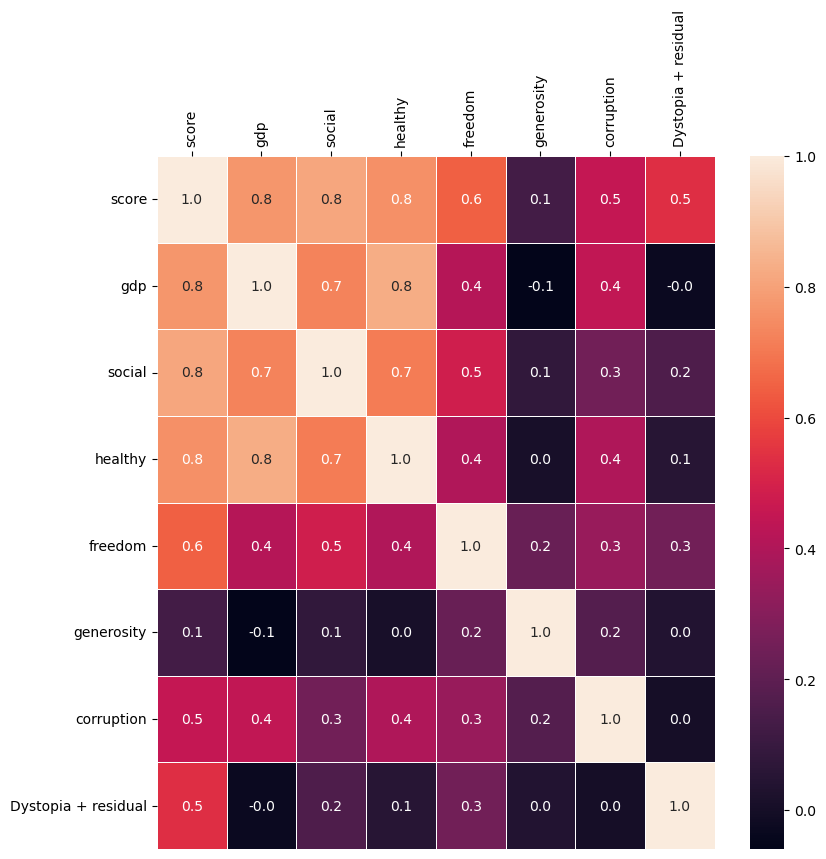

In [43]:
data_num = data.select_dtypes(include=["float64","int64"])

corr=data_num.corr()


f,ax = plt.subplots(figsize=(9,9))
sns.heatmap(corr, annot=True , linewidths= .5, fmt='.1f' , ax=ax )
ax.xaxis.tick_top();
ax.tick_params(bottom=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()



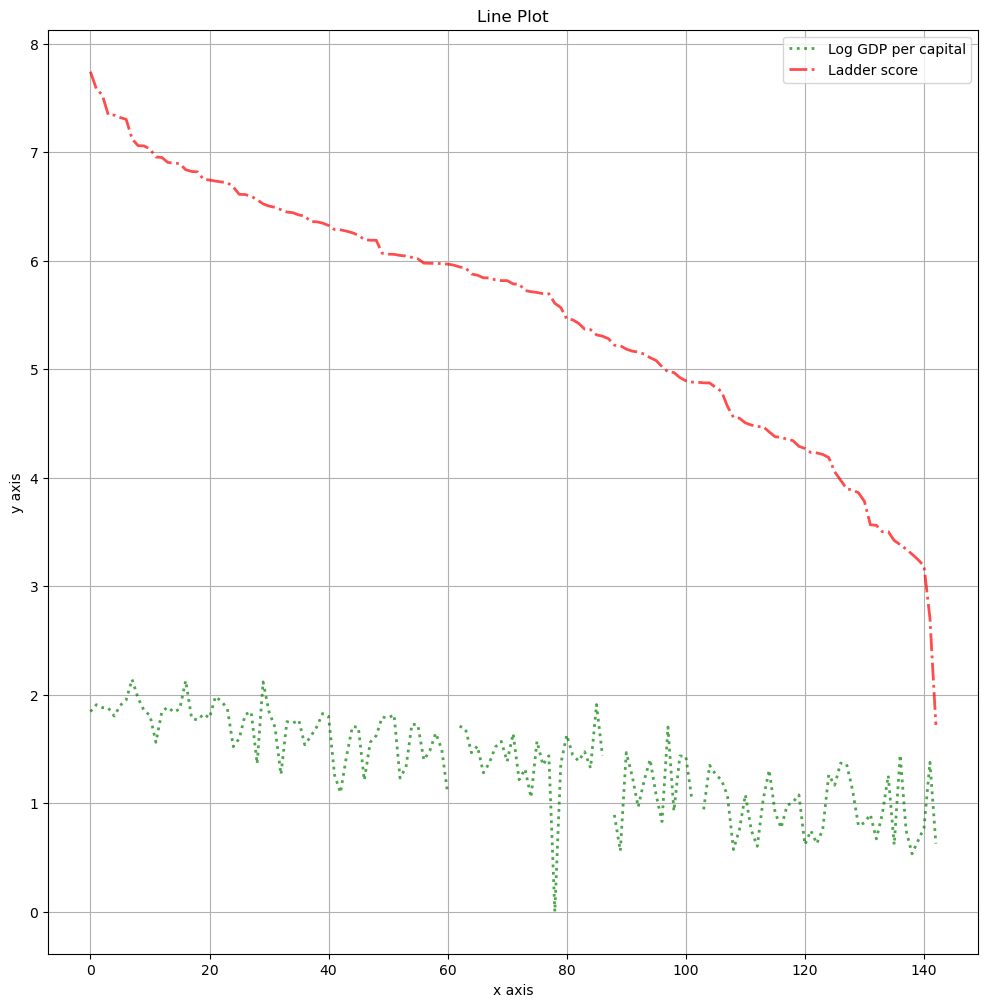

In [11]:
plt.figure(figsize=(12,12))
data["gdp"].plot(kind = 'line', color = 'g',label = "Log GDP per capital",linewidth=2,alpha = 0.7,grid = True,linestyle = ':')
data["score"].plot(color = 'r',label = "Ladder score",linewidth=2, alpha = 0.7,grid = True,linestyle = '-.')
plt.legend(loc='upper right') 
plt.xlabel('x axis')              
plt.ylabel('y axis')
plt.title('Line Plot')   
plt.show()

Text(0.5, 1.0, 'Social Support effect over life exp')

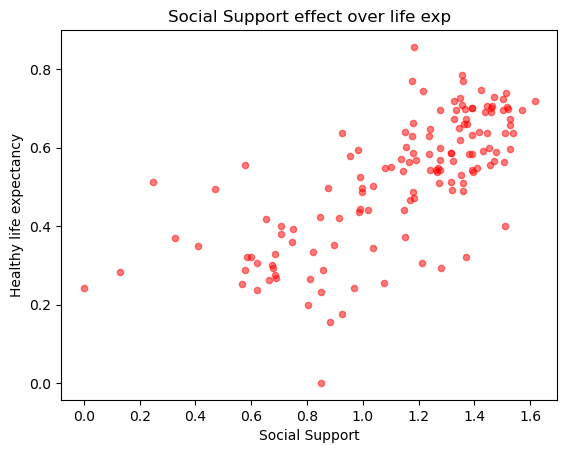

In [33]:

data.plot(kind='scatter', x='social' , y="healthy",alpha = 0.5,color = 'red')
plt.xlabel("Social Support" )              
plt.ylabel("Healthy life expectancy")
plt.title("Social Support effect over life exp") 


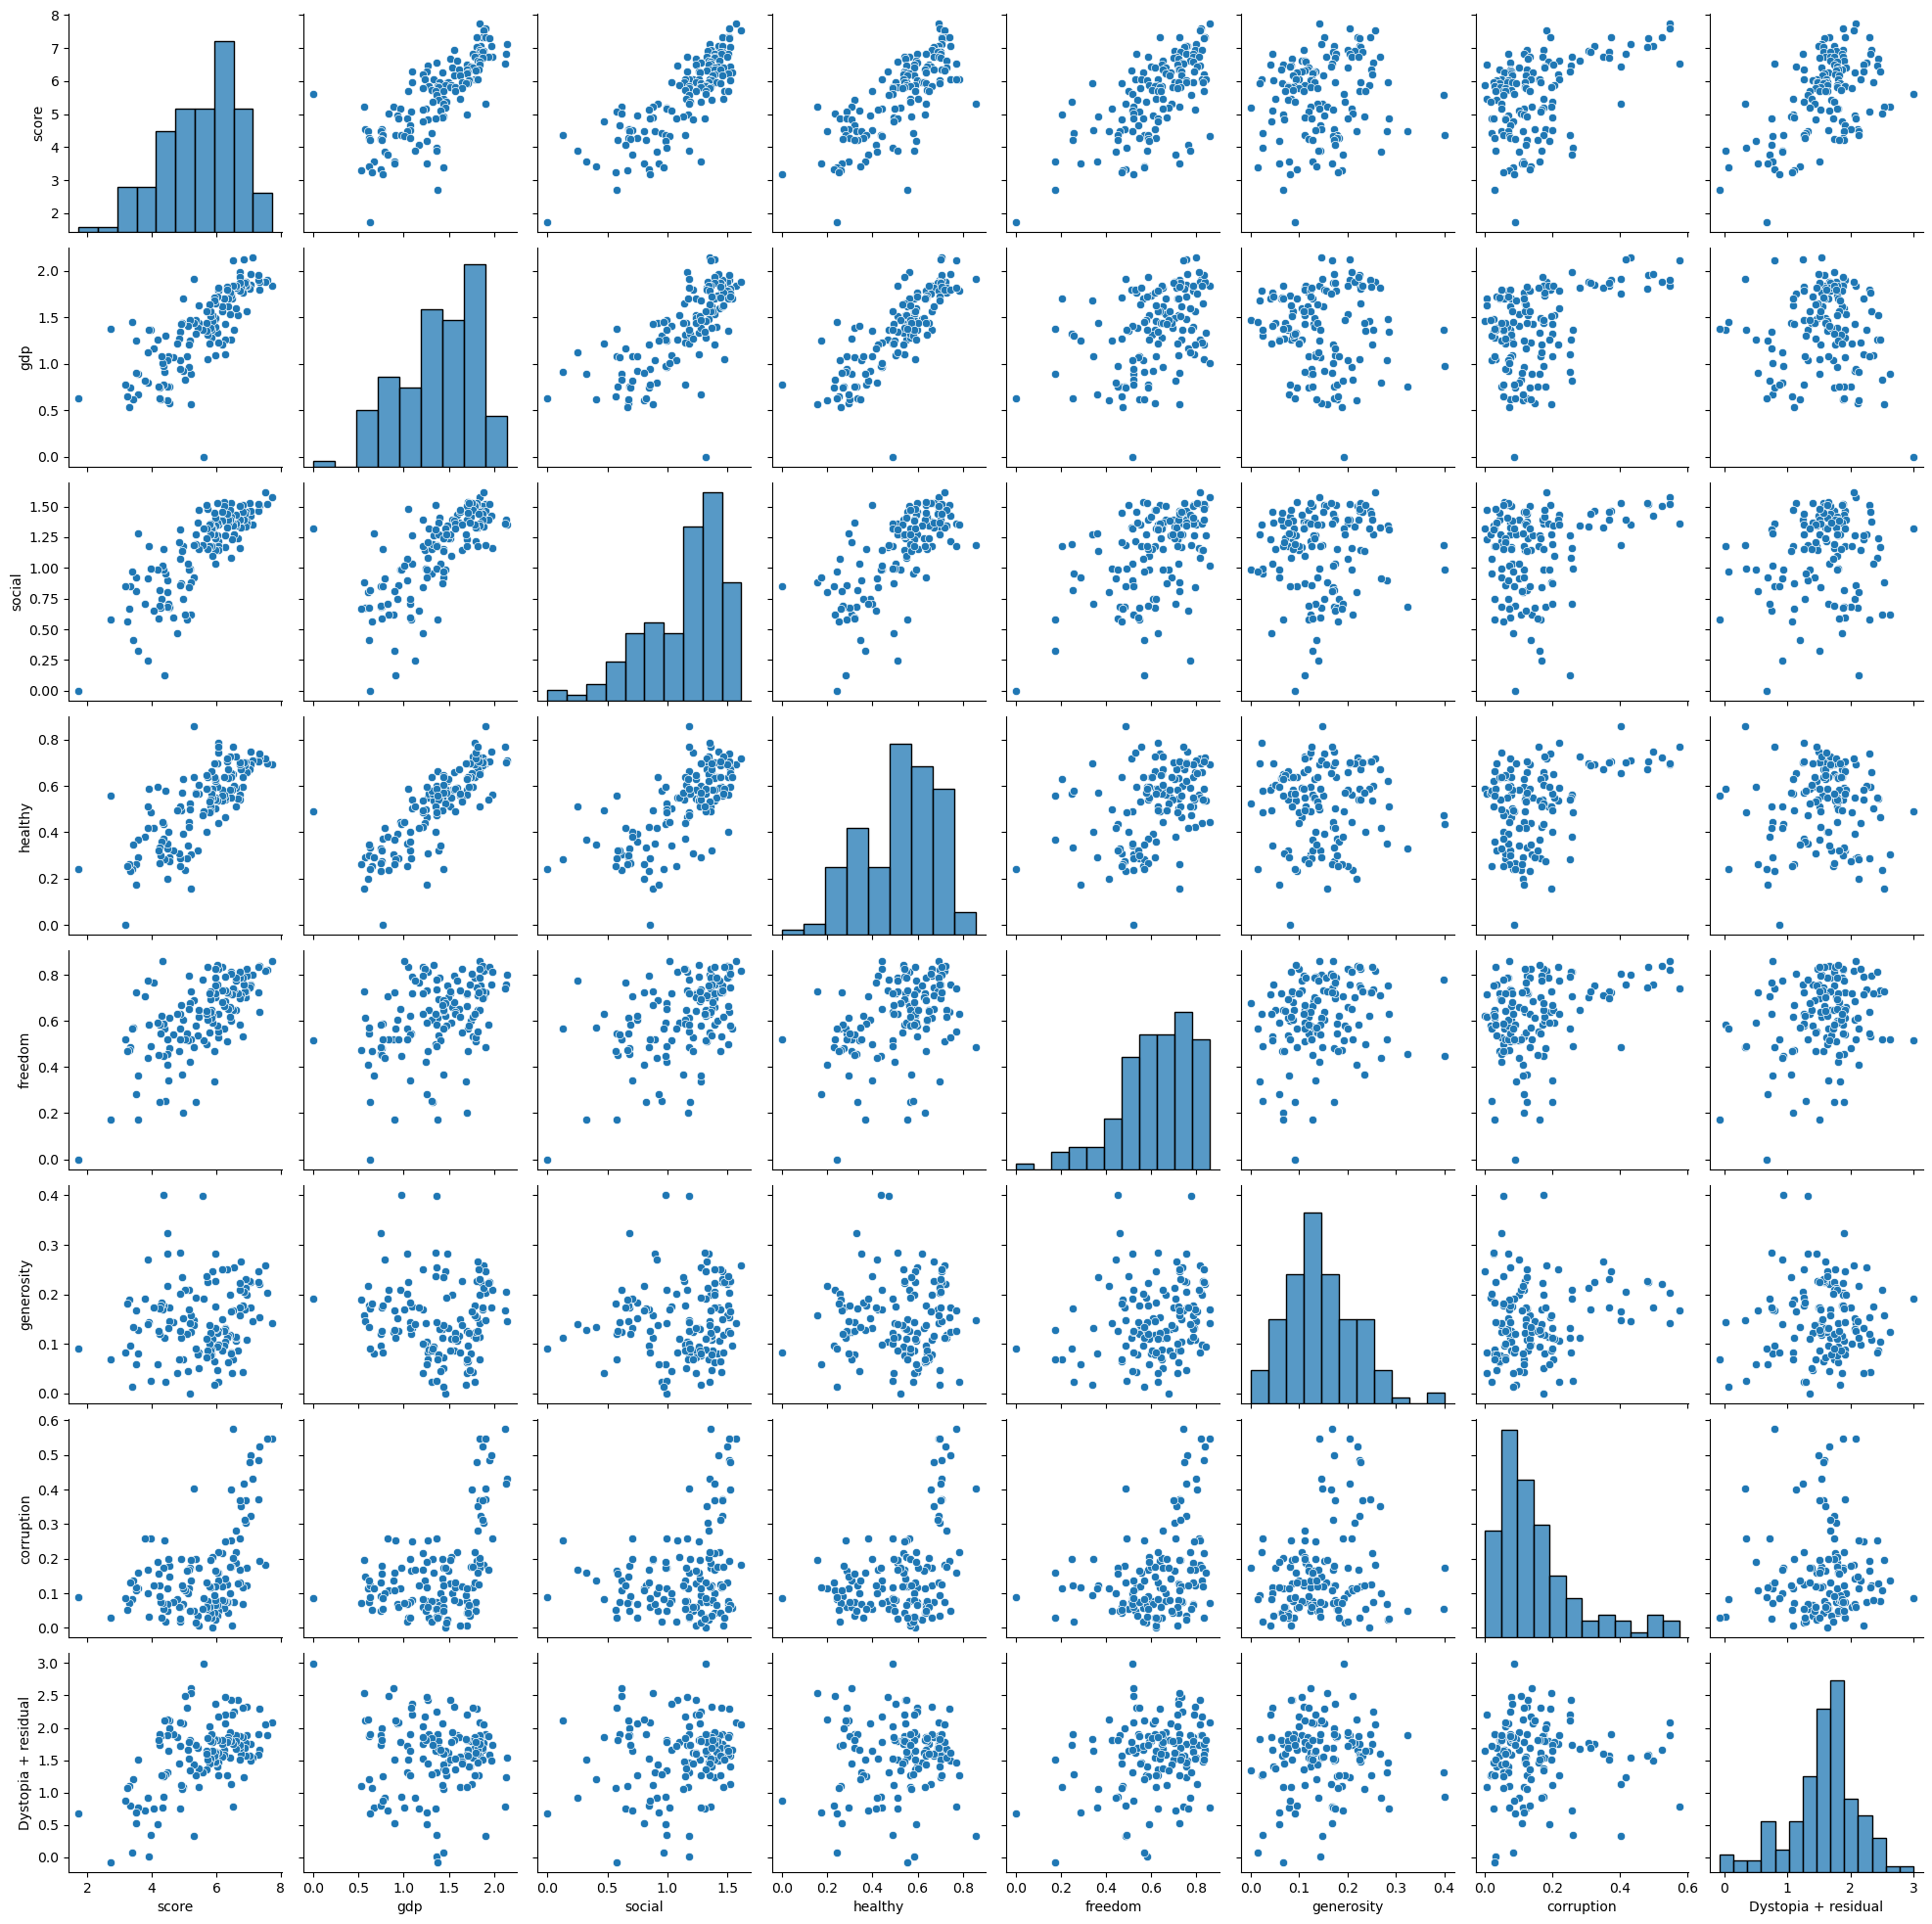

In [35]:
sns.pairplot(data)

In [36]:
df = data.copy()
df = df = df.select_dtypes(include=["float64","int64"])
df.head()

,score,gdp,social,healthy,freedom,generosity,corruption,Dystopia + residual
0,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298


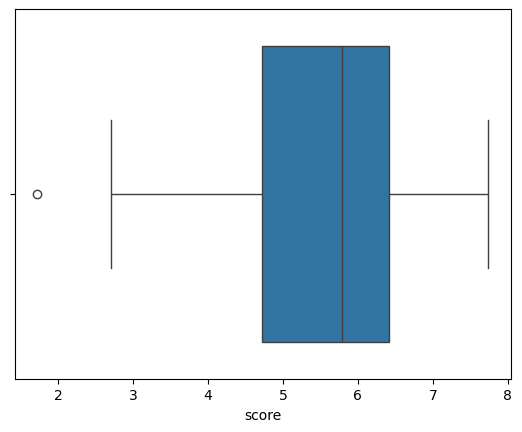

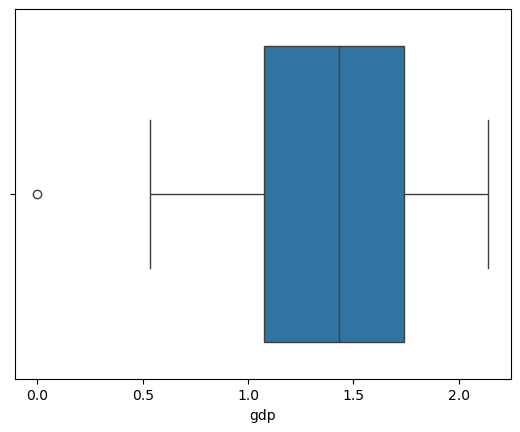

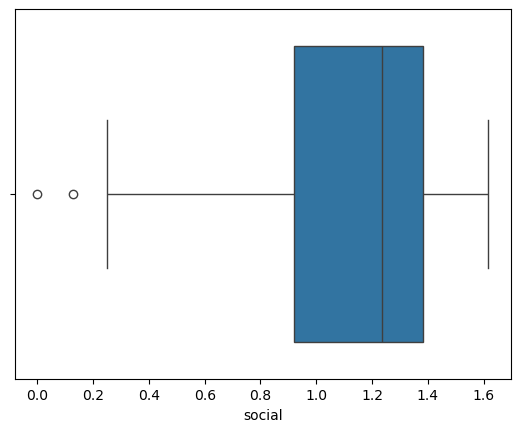

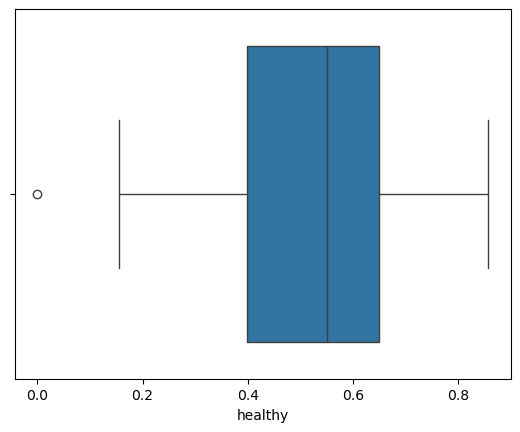

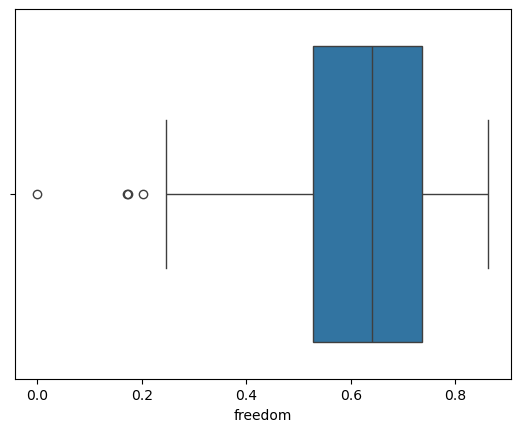

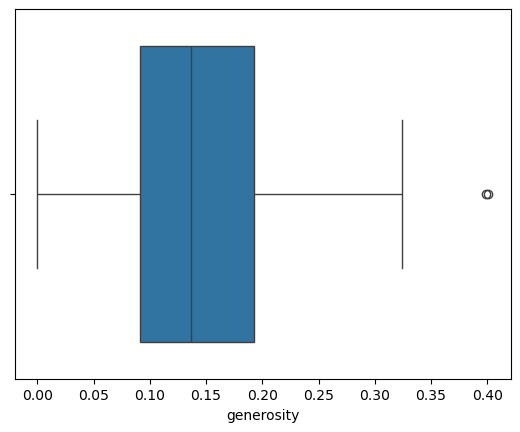

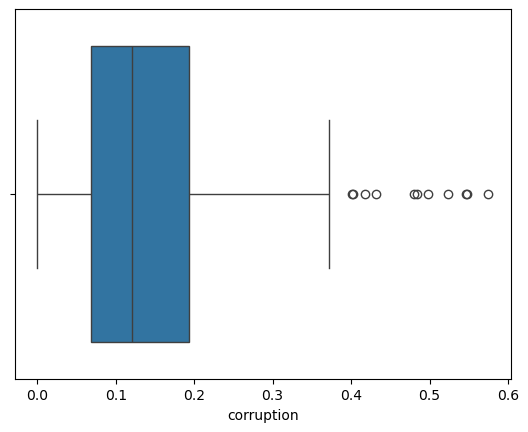

In [40]:
column_list = ["score","gdp","social","healthy","freedom","generosity","corruption"]
for col in column_list:
    sns.boxplot(x = df[col])
    plt.xlabel(col)
    plt.show()

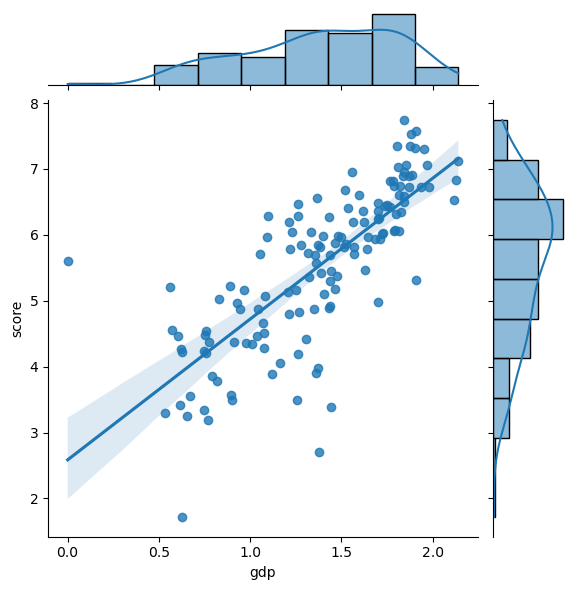

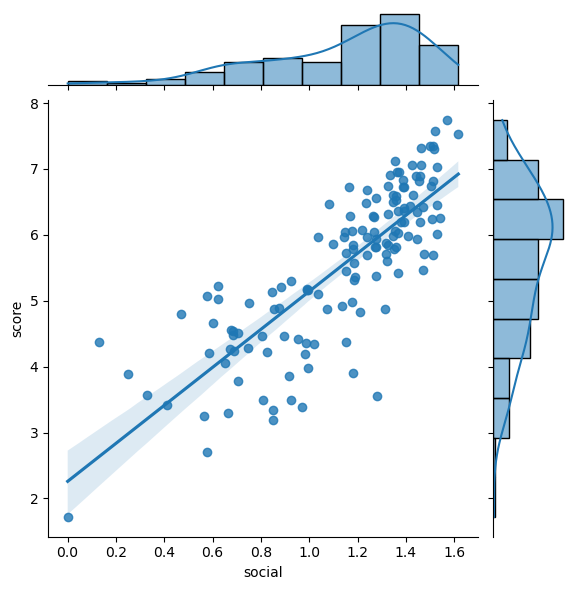

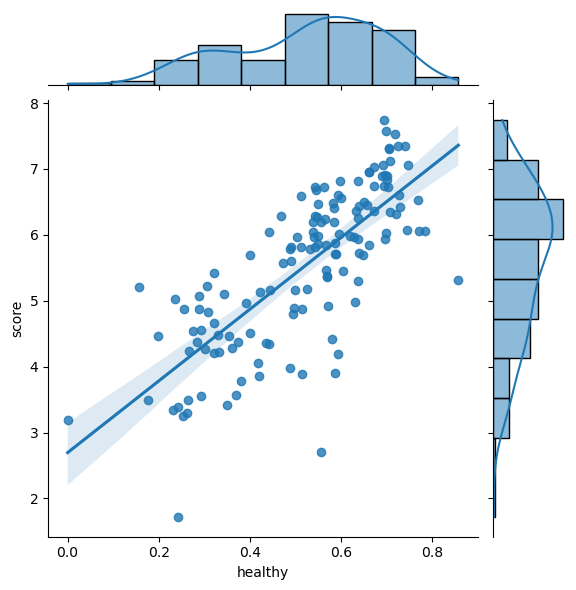

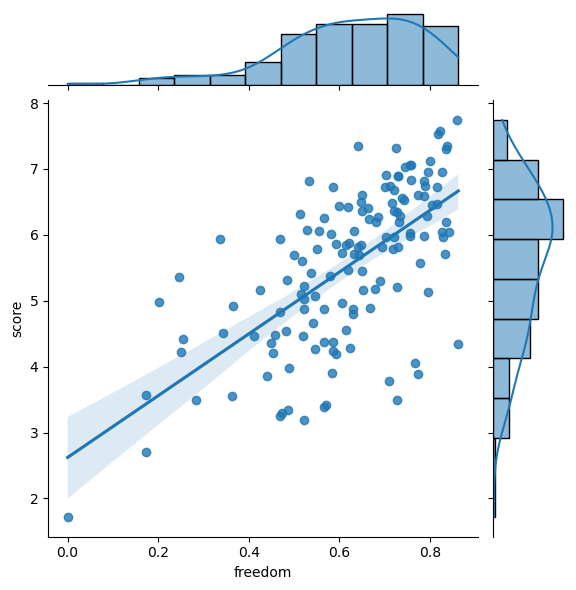

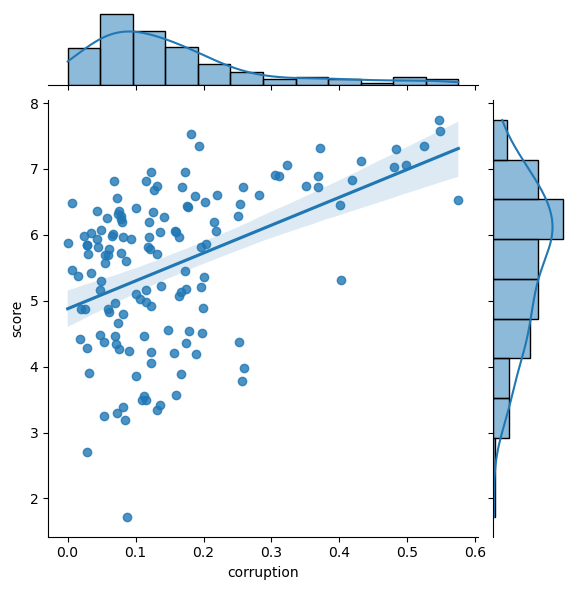

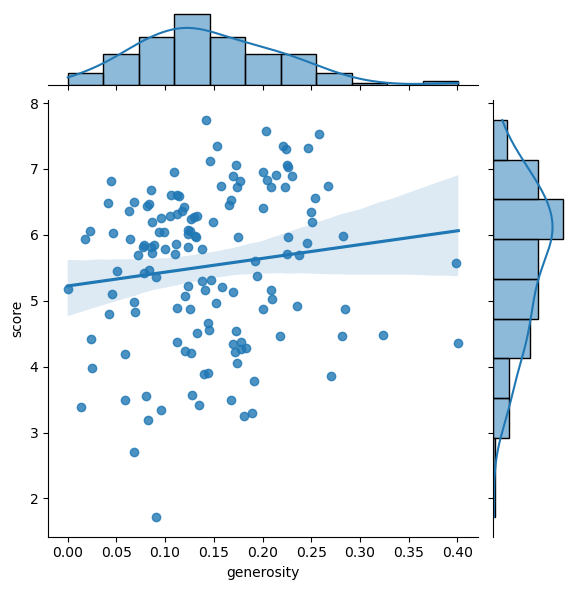

In [46]:
cols = ["gdp", "social", "healthy", "freedom", "corruption", "generosity"]

for c in cols:
    sns.jointplot(x=c, y="score", data=df, kind="reg")
    plt.show()